## Lobes SED regions


- Plot SED and models of flux densities measured in different regions of the lobes
- Read SYNAGE++ results
- Plot SED and models


In [1]:
import numpy as np
import shutil
from astropy.io import ascii, fits
import fluxInt
import pbCorr
import synCl
from prettytable import PrettyTable


fint = fluxInt.flInt()
pb = pbCorr.pbcorr()
syn = synCl.synClean()

rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'
#rootDir = '/Users/maccagni/Projects/MFS/FornaxA/contData/'

figDir = rootDir+'sedFigs/'

regName = ['bridge',  'Eh',  'Ej',
           'En',  'Es', 'Ec',  'Wh', 
           'Wj',  'Wn',  'Ws', 'Wc','Wc2']

aut = ''
coreAut = 'Pbcorr'

inTabs = rootDir+'inTabs/'

ToTDir = rootDir+'ToT/'
#CoreDir = rootDir+'kore/'


fint.rootdir = rootDir
syn.rootdir = rootDir
pb.rootdir = rootDir

print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


	+---------+
	 Inputs loaded
	+---------+


In [2]:

for i in xrange(0,len(regName)):
    
    statsJP = syn.readCIStats(ToTDir+'synOut/'+regName[i]+'JP.stats')


    print '''\t+---------+\n\t'''+regName[i]+'''\n\t+---------+'''
    
    JP = PrettyTable(['JP', 'value'])
    for key, val in statsJP.items():
        JP.add_row([key, val])
        
    print JP
    print i
    if i == 0:
        bridgeStatsJP = statsJP.copy()

    elif i ==1:  
        EhStatsJP = statsJP.copy()

    elif i == 2:
        EjStatsJP = statsJP.copy()
        
    elif i ==3:
        EnStatsJP = statsJP.copy()

    elif i ==4:
        EsStatsJP = statsJP.copy()
    
    elif i ==5:
        EcStatsJP = statsJP.copy()

    elif i ==6:
        WhStatsJP = statsJP.copy()
        
    elif i ==7:
        WjStatsJP = statsJP.copy()

    elif i ==8:
        WnStatsJP = statsJP.copy()

    elif i ==9:
        WsStatsJP = statsJP.copy()
        
    elif i ==10:
        WcStatsJP = statsJP.copy()
        
print '''\t+---------+\n\t Synage results read\n\t+---------+'''


	+---------+
	bridge
	+---------+
+--------------+-----------+
|      JP      |   value   |
+--------------+-----------+
| alpha_errsup |    0.0    |
|    break     |  15392.47 |
|    chisq     |  10.98442 |
|    chired    |  2.196884 |
|  break_inf   | -1972.823 |
|    alpha     |    0.5    |
|     ndf      |    5.0    |
| alpha_errinf |    -0.0   |
|     norm     | 0.3000934 |
|  break_sup   |  2643.446 |
+--------------+-----------+
0
	+---------+
	Eh
	+---------+
+--------------+-----------+
|      JP      |   value   |
+--------------+-----------+
| alpha_errsup |    0.0    |
|    break     |  19787.62 |
|    chisq     | 0.3981505 |
|    chired    | 0.0796301 |
|  break_inf   | -3016.379 |
|    alpha     |    0.5    |
|     ndf      |    5.0    |
| alpha_errinf |    -0.0   |
|     norm     | 0.5812611 |
|  break_sup   |  3669.829 |
+--------------+-----------+
1
	+---------+
	Ej
	+---------+
+--------------+-----------+
|      JP      |   value   |
+--------------+-----------+
| a

In [3]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms

def plot_JP(tot,mod_JP,statsJP,labe,color_plot,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-1,5e1])
    ax1.set_xlim([1e2,5e4])
    ax1.tick_params(axis='both', which='major', pad=5)
    ax1.xaxis.set_minor_locator(LogLocator(base=10,subs=[2.0,4.0,6.0,8.0]))
    ax1.yaxis.set_minor_locator(LogLocator(base=10,subs=[2.0,4.0,6.0,8.0]))  
    #ax1.yaxis.set_ticklabels([0.1,1.,10])
    
    # MODELS
    
    idx_max = (np.abs(mod_JP[0] - 5e5)).argmin()
    idx_min = (np.abs(mod_JP[0] - 30)).argmin()
    totplot = ax1.errorbar(tot['Frequency [MHz]'],tot['Integrated Flux [Jy]'], yerr=tot['Error [Jy]'],
             marker='o', color=color_plot[0], linestyle=' ',label=labe,capsize=6) 

    ax1.plot(mod_JP[0][idx_min:idx_max],mod_JP[1][idx_min:idx_max],lw=3, marker=' ', 
             color=color_plot[2], linestyle='-.',label=r'JP',alpha=0.5)

    idx_br = (np.abs(mod_JP[0] - float(statsJP['break']))).argmin()
    ax1.axvline(statsJP['break'],ymin=0,ymax=0.55,ls='-.',c=color_plot[2],lw=2,alpha=0.5)

    plt.text(150,0.2, r'$\nu_{\rm break} = $'
             +str(round(float(statsJP['break'])/1e3,2))+'$^{+'+
             str(round(float(statsJP['break_sup'])/1e3,2))+'}_{-'+
             str(round(-float(statsJP['break_inf'])/1e3,2))+'}$ GHz')
    totplot[-1][0].set_linestyle('--')
    totplot[-1][0].set_linewidth(3)    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 20})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


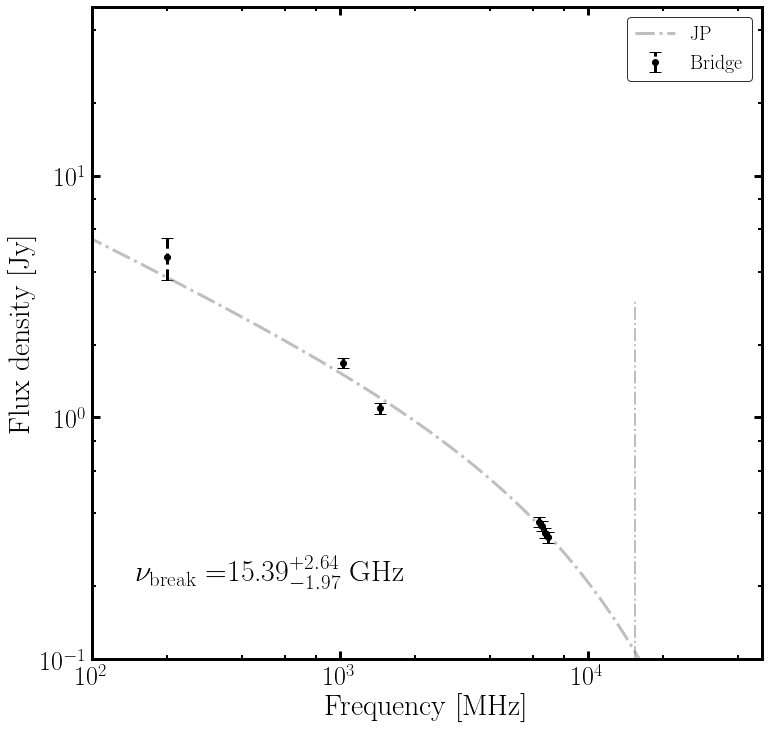

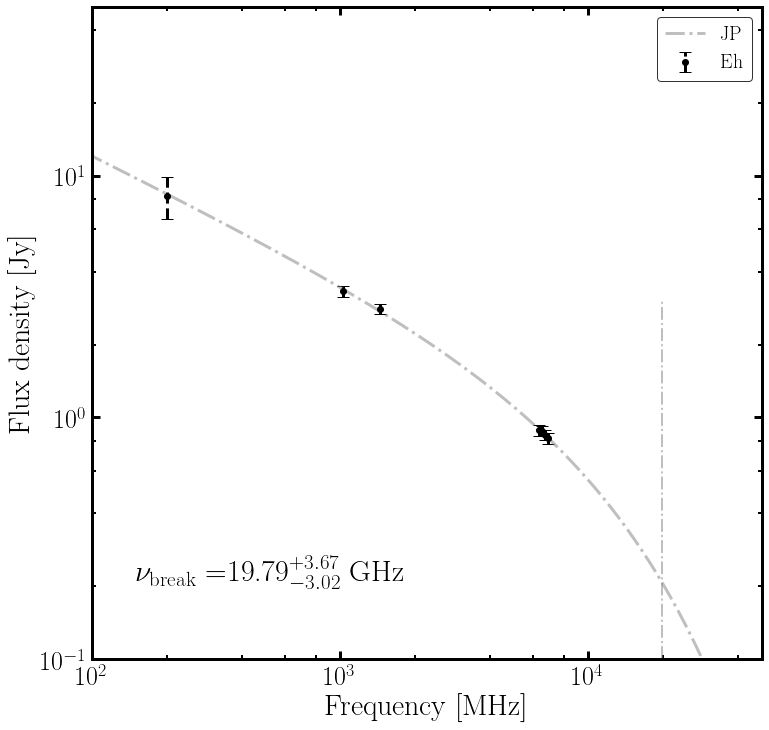

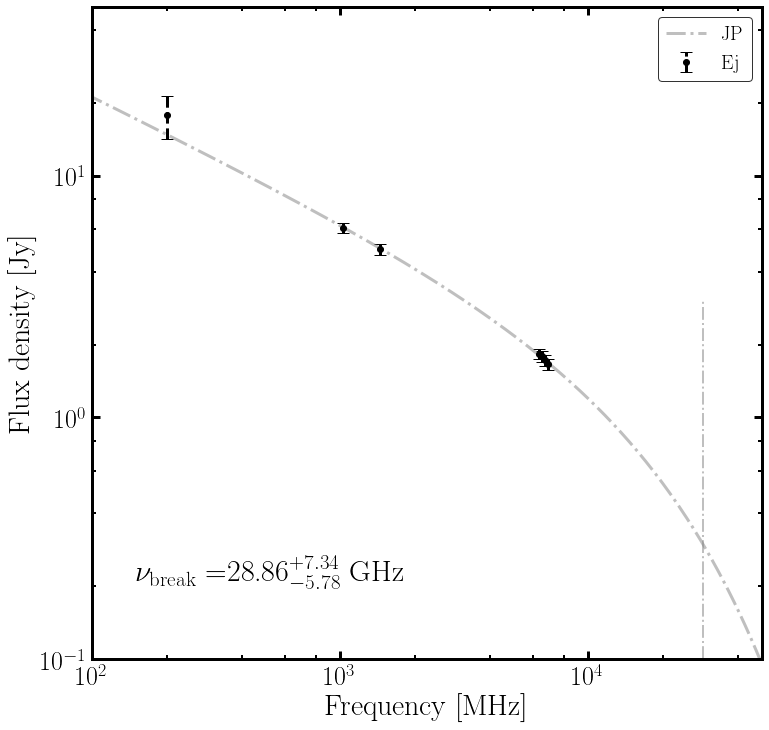

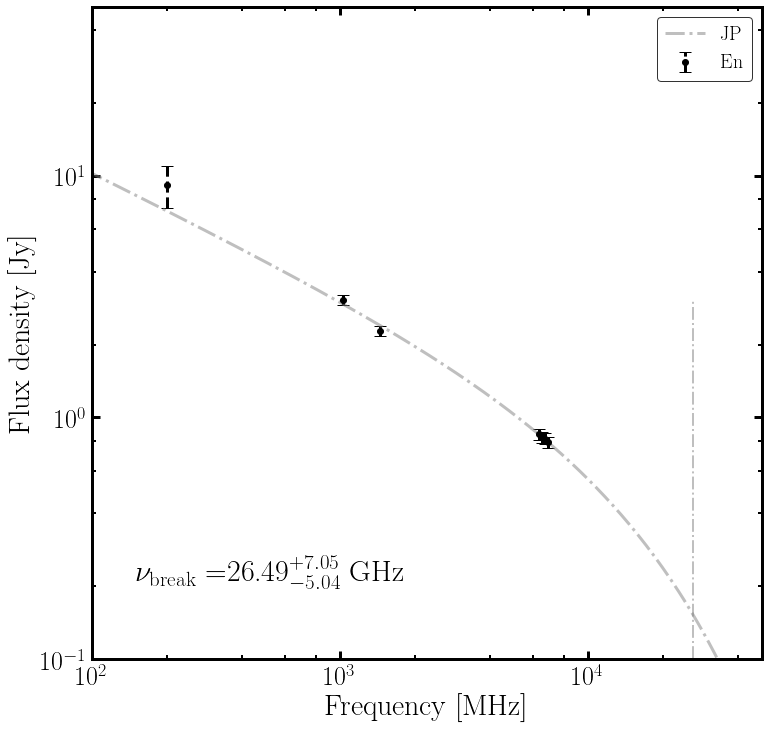

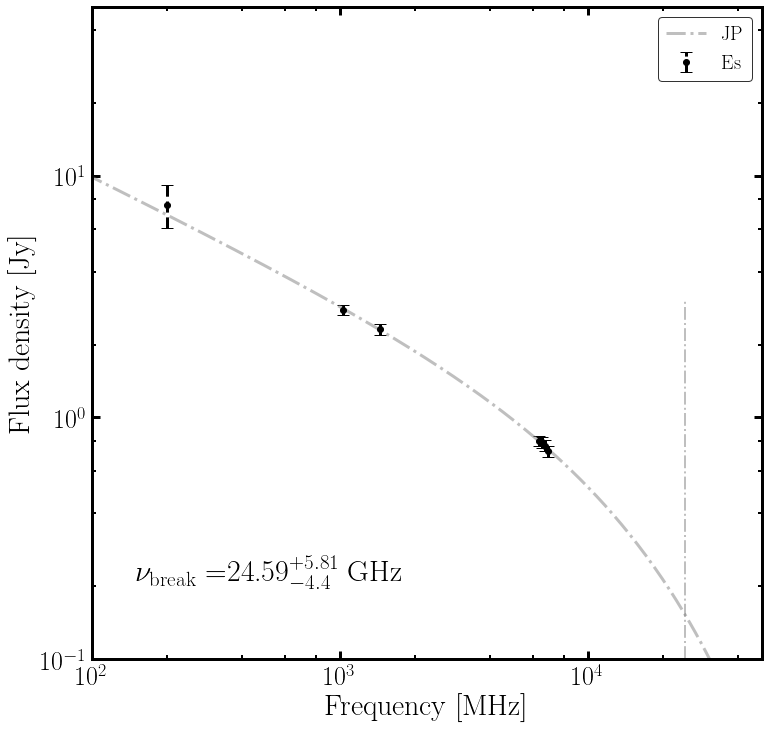

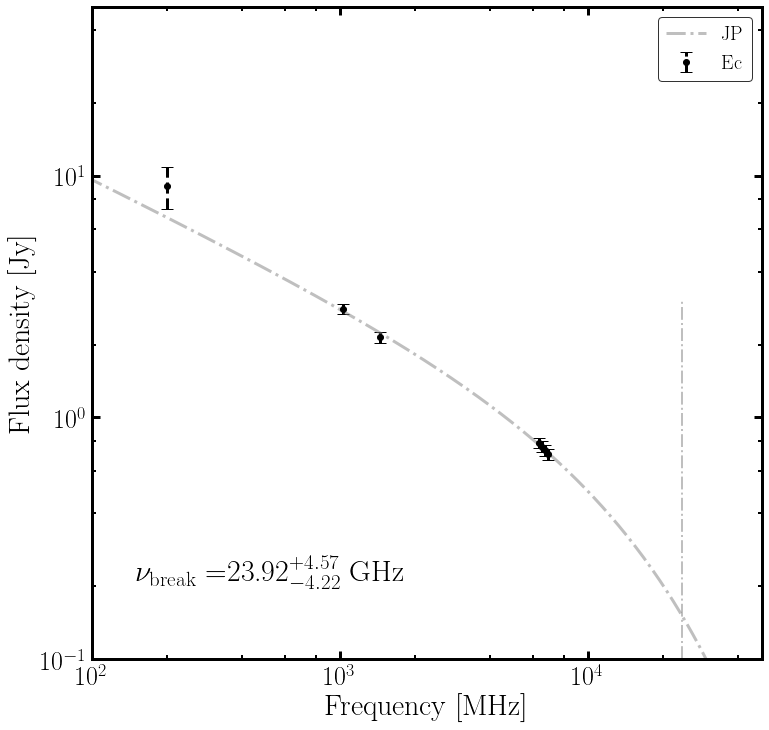

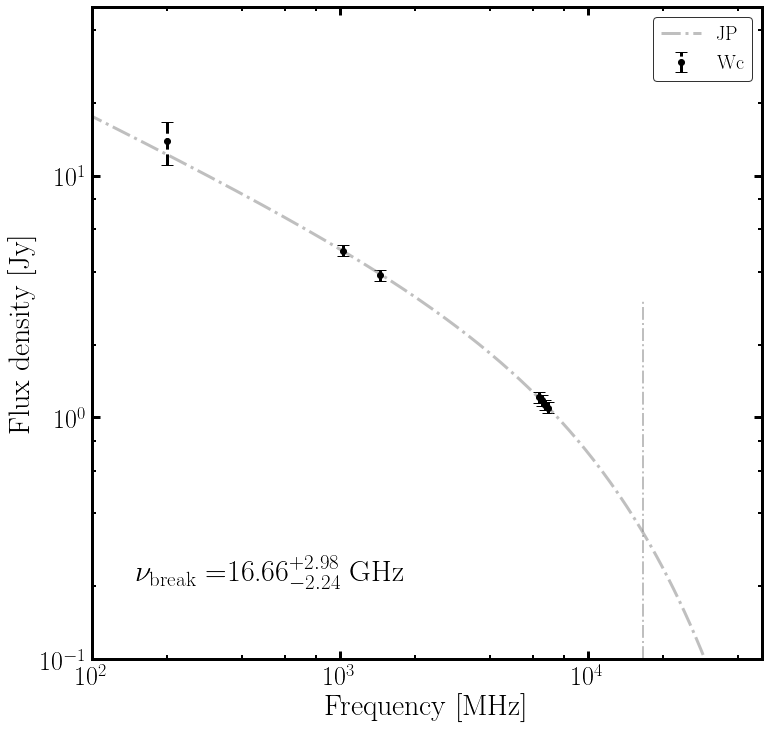

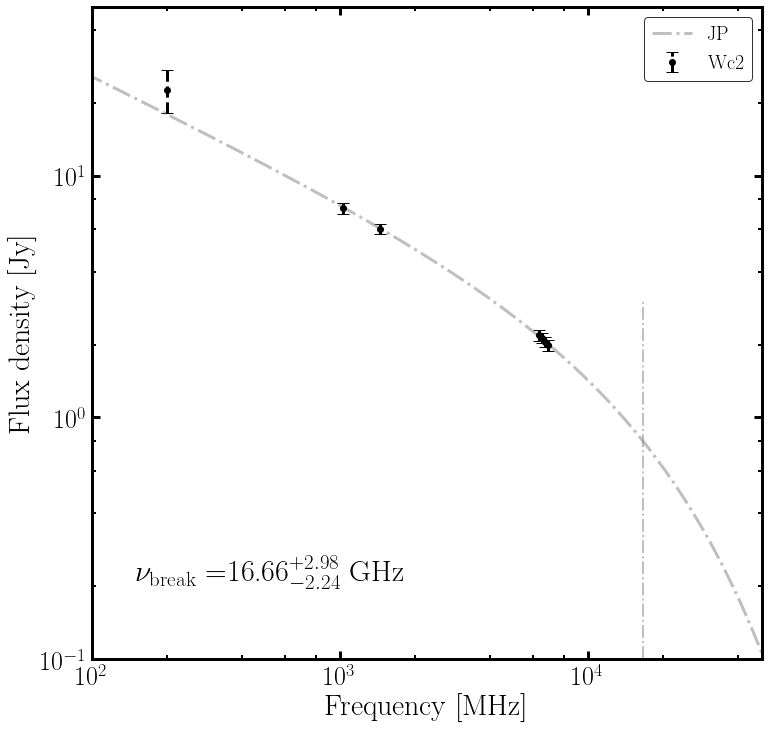

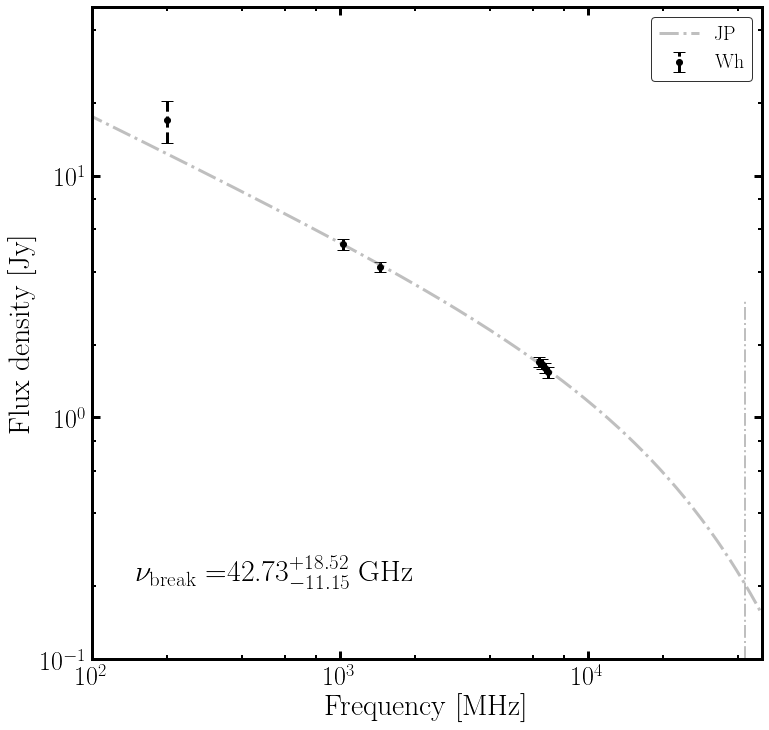

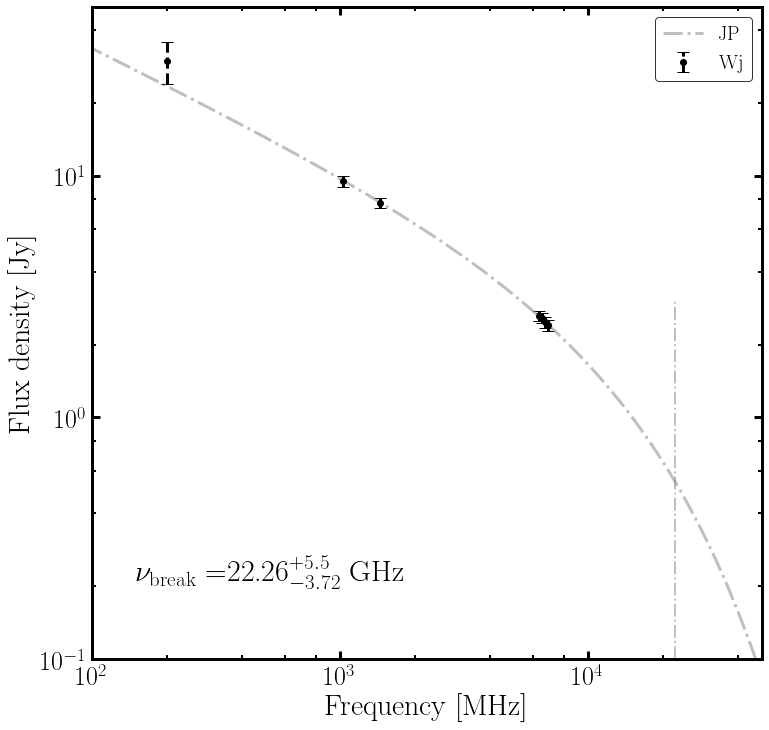

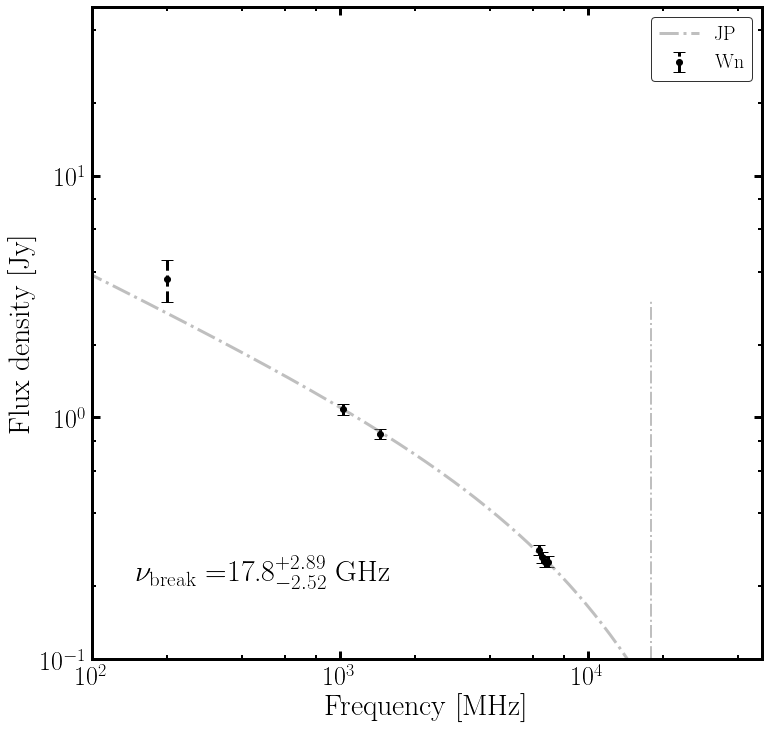

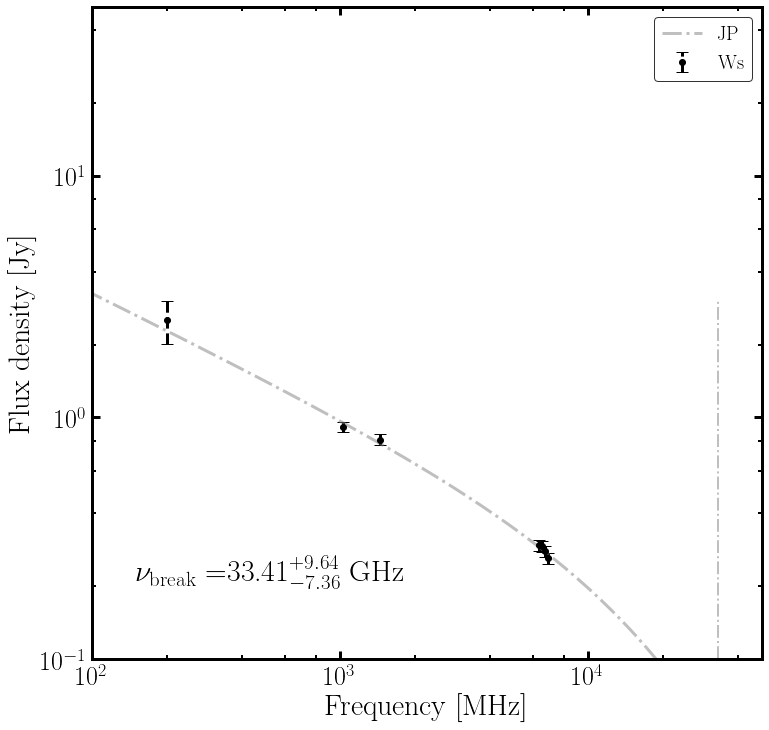

In [5]:

regName = ['bridge',  'Eh',  'Ej',
           'En',  'Es', 'Ec',  'Wh', 
           'Wj',  'Wn',  'Ws', 'Wc']

bridge= ascii.read(ToTDir+'bridgeFlReg.tbl', fast_reader=False)
bridgeJP = syn.readCIMod(ToTDir+'synOut/bridgeJP_point1_fit.dat')
outplot=figDir+'regions/bridgeJP.png'
plot_JP(bridge,bridgeJP,bridgeStatsJP,'Bridge',['black','dimgrey','grey'],outplot)

eh= ascii.read(ToTDir+'EhFlReg.tbl', fast_reader=False)
ehJP = syn.readCIMod(ToTDir+'synOut/EhJP_point1_fit.dat')
outplot=figDir+'regions/EhJP.png'
plot_JP(eh,ehJP,EhStatsJP,'Eh',['black','dimgrey','grey'],outplot)

ej= ascii.read(ToTDir+'EjFlReg.tbl', fast_reader=False)
ejJP = syn.readCIMod(ToTDir+'synOut/EjJP_point1_fit.dat')
outplot=figDir+'regions/EjJP.png'
plot_JP(ej,ejJP,EjStatsJP,'Ej',['black','dimgrey','grey'],outplot)

en= ascii.read(ToTDir+'EnFlReg.tbl', fast_reader=False)
enJP = syn.readCIMod(ToTDir+'synOut/EnJP_point1_fit.dat')
outplot=figDir+'regions/EnJP.png'
plot_JP(en,enJP,EnStatsJP,'En',['black','dimgrey','grey'],outplot)

es= ascii.read(ToTDir+'EsFlReg.tbl', fast_reader=False)
esJP = syn.readCIMod(ToTDir+'synOut/EsJP_point1_fit.dat')
outplot=figDir+'regions/EsJP.png'
plot_JP(es,esJP,EsStatsJP,'Es',['black','dimgrey','grey'],outplot)

ec= ascii.read(ToTDir+'EcFlReg.tbl', fast_reader=False)
ecJP = syn.readCIMod(ToTDir+'synOut/EcJP_point1_fit.dat')
outplot=figDir+'regions/EcJP.png'
plot_JP(ec,ecJP,EcStatsJP,'Ec',['black','dimgrey','grey'],outplot)

wc= ascii.read(ToTDir+'WcFlReg.tbl', fast_reader=False)
wcJP = syn.readCIMod(ToTDir+'synOut/WcJP_point1_fit.dat')
outplot=figDir+'regions/WcJP.png'
plot_JP(wc,wcJP,WcStatsJP,'Wc',['black','dimgrey','grey'],outplot)

wc= ascii.read(ToTDir+'Wc2FlReg.tbl', fast_reader=False)
wcJP = syn.readCIMod(ToTDir+'synOut/Wc2JP_point1_fit.dat')
outplot=figDir+'regions/Wc2JP.png'
plot_JP(wc,wcJP,WcStatsJP,'Wc2',['black','dimgrey','grey'],outplot)


wh= ascii.read(ToTDir+'WhFlReg.tbl', fast_reader=False)
whJP = syn.readCIMod(ToTDir+'synOut/WhJP_point1_fit.dat')
outplot=figDir+'regions/WhJP.png'
plot_JP(wh,whJP,WhStatsJP,'Wh',['black','dimgrey','grey'],outplot)

wj= ascii.read(ToTDir+'WjFlReg.tbl', fast_reader=False)
wjJP = syn.readCIMod(ToTDir+'synOut/WjJP_point1_fit.dat')
outplot=figDir+'regions/WjJP.png'
plot_JP(wj,wjJP,WjStatsJP,'Wj',['black','dimgrey','grey'],outplot)

wn= ascii.read(ToTDir+'WnFlReg.tbl', fast_reader=False)
wnJP = syn.readCIMod(ToTDir+'synOut/WnJP_point1_fit.dat')
outplot=figDir+'regions/WnJP.png'
plot_JP(wn,wnJP,WnStatsJP,'Wn',['black','dimgrey','grey'],outplot)

ws= ascii.read(ToTDir+'WsFlReg.tbl', fast_reader=False)
wsJP = syn.readCIMod(ToTDir+'synOut/WsJP_point1_fit.dat')
outplot=figDir+'regions/WsJP.png'
plot_JP(ws,wsJP,WsStatsJP,'Ws',['black','dimgrey','grey'],outplot)

#outplot=figDir+'Core_CICIOFF'+aut+'.png'
#plot_CI_over_CIOFF(Core,CoreModCI,CoreModCIOFF,CoreStatsCI,CoreStatsCIOFF,'Core',['green','darkgreen','mediumseagreen'],outplot)


In [ ]:
print WcStatsJP['break']/1e3,WjStatsJP['break']/1e3, WhStatsJP['break']/1e3,WnStatsJP['break']/1e3,WsStatsJP['break']/1e3
print EcStatsJP['break']/1e3,EjStatsJP['break']/1e3, EhStatsJP['break']/1e3,EnStatsJP['break']/1e3,EsStatsJP['break']/1e3

In [ ]:
print WcStatsJP['norm'],WjStatsJP['norm'], WhStatsJP['norm'],WnStatsJP['norm'],WsStatsJP['norm']
print EcStatsJP['norm'],EjStatsJP['norm'], EhStatsJP['norm'],EnStatsJP['norm'],EsStatsJP['norm']

arrW = np.array([WcStatsJP['norm'],WjStatsJP['norm'], WhStatsJP['norm'],WnStatsJP['norm'],WsStatsJP['norm']])
arrww = np.array([WcStatsJP['break']/1e3,WjStatsJP['break']/1e3, WhStatsJP['break']/1e3,WnStatsJP['break']/1e3,WsStatsJP['break']/1e3])

arrE = np.array([EcStatsJP['norm'],EjStatsJP['norm'], EhStatsJP['norm'],EnStatsJP['norm'],EsStatsJP['norm']])
arree = np.array([EcStatsJP['break']/1e3,EjStatsJP['break']/1e3, EhStatsJP['break']/1e3,EnStatsJP['break']/1e3,EsStatsJP['break']/1e3])

In [ ]:
print np.average(arrww,weights=arrW)

print np.average(arree,weights=arrE)